In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [4]:
import pandas as pd
df = pd.read_csv(r"<file_path>.csv", encoding = 'utf-8')
df.drop(columns=['eTime','sTime'], inplace=True)

df.head(10)

,sIP,dIP,sPort,dPort,Proto,Packets,Bytes,Flags,Duration
0,3232249961,3232249960,55048,443,6,7,919,27,0.055
1,3232249960,3232249961,443,55048,6,4,1766,27,0.054
2,3232249961,3232249960,55050,443,6,7,919,27,0.041
3,3232249960,3232249961,443,55050,6,4,1766,27,0.032
4,3232249961,3232249960,55052,443,6,7,919,27,0.010
5,3232249960,3232249961,443,55052,6,5,1818,27,0.010
6,3232249961,3232249960,55054,443,6,7,919,27,0.009
7,3232249960,3232249961,443,55054,6,4,1766,27,0.009
8,3232249961,3232249960,55056,443,6,20,4385,30,7.755
9,3232249960,3232249961,443,55056,6,12,16198,27,7.755


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,sIP,dIP,sPort,dPort,Proto,Packets,Bytes,Flags,Duration
0,0.266071,-0.075545,0.929616,-1.013803,-0.079003,-0.007003,-0.115864,0.158855,-0.059944
1,-0.219091,-0.075545,-0.981233,0.894890,-0.079003,-0.183282,-0.068199,0.158855,-0.059974
2,0.266071,-0.075545,0.929686,-1.013803,-0.079003,-0.007003,-0.115864,0.158855,-0.060362
3,-0.219091,-0.075545,-0.981233,0.894960,-0.079003,-0.183282,-0.068199,0.158855,-0.060631
4,0.266071,-0.075545,0.929756,-1.013803,-0.079003,-0.007003,-0.115864,0.158855,-0.061289


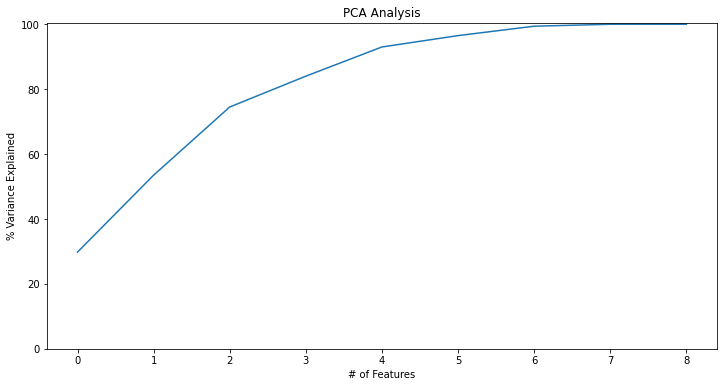

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=9)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [17]:
pca = PCA(n_components=4)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3', 'pc4'])
print(pca.explained_variance_ratio_)

[0.29768542 0.23700594 0.20984374 0.09538376]


In [18]:
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

pca_eps_values = np.arange(0.2,1.5,0.1) 
pca_min_samples = np.arange(2,5) 
pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))

pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []

for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score.append(silhouette_score(pca_df, pca_dbscan_cluster.labels_))

pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
pca_eps_min_df

,no_of_clusters,silhouette_score,epsilon_values,minimum_points
0,18,0.969318,0.2,2
1,14,0.967113,0.2,3
2,12,0.965883,0.2,4
3,15,0.968553,0.3,2
4,12,0.966876,0.3,3
5,12,0.966876,0.3,4
6,13,0.969179,0.4,2
7,10,0.969347,0.4,3
8,10,0.969046,0.4,4
9,12,0.971642,0.5,2


In [21]:
db = DBSCAN(eps=1.0, min_samples=4).fit(pca_df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(pca_df, labels))


Estimated number of clusters: 8
Estimated number of noise points: 15
Silhouette Coefficient: 0.973


In [22]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [23]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([  15, 2572, 2572,   28,   28,   26,  120,    4,    5]))

In [28]:
# Para juntar o label ao dateset original
df["Cluster"]=labels
# Para ver as linhas do cluster -1
df[df.Cluster == -1]

,sIP,dIP,sPort,dPort,Proto,Packets,Bytes,Flags,Duration,Cluster
451,3232249961,3758096406,0,0,2,2,80,0,0.969,-1
452,3232249961,3758096635,5353,5353,17,3,204,0,3.003,-1
488,3232249961,3232249960,55404,443,6,164,59969,30,96.512,-1
489,3232249960,3232249961,443,55404,6,88,159063,27,96.510,-1
3163,3232249961,3232249956,68,67,17,6,1860,0,1500.036,-1
3164,3232249956,3232249961,67,68,17,6,3456,0,1500.016,-1
3833,3232249857,3758096635,5353,5353,17,6,394,0,9.125,-1
4391,3232249961,3232249956,68,67,17,2,620,0,300.025,-1
4392,3232249956,3232249961,67,68,17,2,1152,0,299.983,-1
5299,3232249857,3758096635,5353,5353,17,1,169,0,0.000,-1
